In [6]:
import numpy as np
import matplotlib.pyplot as plt 


## TV graph

- Run this command to get model path save at iterations 2500 for tv and no_tv case
```
python3 /home/vitran/gs7/train_sim_plain.py -s /home/vitran/plenoxels/blender_data/lego_gen12 -m /home/vitran/gs7/output2/lego_gen12_800_dls14 --iterat
ions 3001 --start_checkpoint /home/vitran/gs7/output2/lego_gen12_800_dls14/chkpnt2000.pth -r 1 --dls 1
4 --tv_weight 0.00

python3 /home/vitran/gs7/train_sim_plain.py -s /home/vitran/plenoxels/blender_data/lego_gen12 -m /home/vitran/gs7/output2/lego_dls14_notv --iterations 3001 --start_checkpoint /home/vitran/gs7/output2/lego_dls14_notv/chkpnt2000.pth -r 1 --dls 14 --tv_weight 0.00
```
- Run the render.py to render psnr for test images at iterations 2500
```
python3 /home/vitran/gs9/render.py -s /home/vitran/plenoxels/blender_data/lego_gen12 -m /home/vitran/gs7/output2/lego_gen12_800_dls14 --iteration 2500 
--skip_train

python3 /home/vitran/gs9/render.py -s /home/vitran/plenoxels/blender_data/lego_gen12 -m /home/vitran/gs7/output2/lego_dls14_notv --iteration 2500 
--skip_train
```
- Get runs metrics
```
python3 /home/vitran/gs9/metrics.py -m /home/vitran/gs7/output2/lego_dls14_notv
```

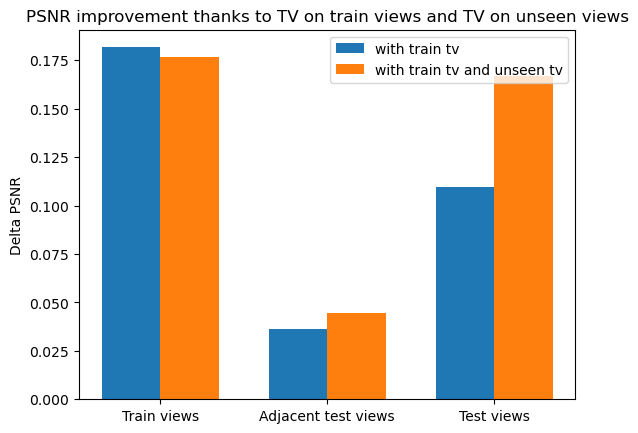

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
# [ITER 2000] Evaluating test: L1 0.0537646139661471 PSNR 19.251134554545082
# [ITER 2000] Evaluating non adj test: L1 0.07040316605767638 PSNR 17.39773836332498
# [ITER 2000] Evaluating train: L1 0.020770446863025427 PSNR 24.85298180580139

# #no tv
# [ITER 2000] Evaluating test: L1 0.0539125216503938 PSNR 19.225636800130207
# [ITER 2000] Evaluating non adj test: L1 0.07068846962347473 PSNR 17.378923303073215
# [ITER 2000] Evaluating train: L1 0.02094674517866224 PSNR 24.808830618858337
groups = ['Train views', 'Adjacent test views', "Test views"]
# Example data

# [ITER 2500] Evaluating test: L1 0.06664255013068517 PSNR 17.725669225056965
# [ITER 2500] Evaluating non adj test: L1 0.08539899609982968 PSNR 16.341468858718873
# [ITER 2500] Evaluating train: L1 0.035652947379276156 PSNR 22.131016612052917
category_1 = [21.95429241657257, 17.681164423624672,16.174531316757204]  # no tv
category_2 = [22.136024236679077, 17.71740659077962,16.284303250312806]  # with train tv 1
category_3 = [22.131016612052917, 17.725669225056965, 16.341468858718873]  # with train tv 1 and unseen tv 0.05

# delta_psnr = [x-y for x,y in zip(category_1,category_2)]
# Set the positions for the bars
x = np.arange(len(groups))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
delta_psnr1 = [y-x for x,y in zip(category_1,category_2)]
delta_psnr2 = [y-x for x,y in zip(category_1,category_3)]
ax.bar(x-width/2, delta_psnr1, width, label='with train tv')
ax.bar(x+width/2, delta_psnr2,width, label='with train tv and unseen tv')

ax.set_ylabel('Delta PSNR')
ax.set_title('PSNR improvement thanks to TV on train views and TV on unseen views')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()

# Show the plot
plt.show()



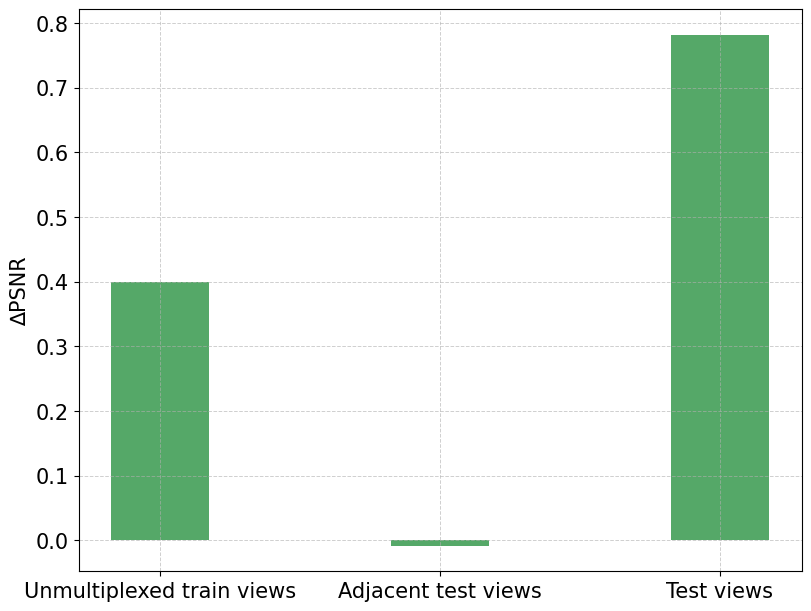

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
groups = ['Unmultiplexed train views', 'Adjacent test views', "Test views"]

# Example data lego dls 14 res 200
# category_1 = [21.95429241657257, 17.681164423624672, 16.174531316757204]  # no tv
# category_2 = [22.136024236679077, 17.71740659077962, 16.284303250312806]  # with train tv 1
# category_3 = [22.131016612052917, 17.725669225056965, 16.341468858718873]  # with train tv 1 and unseen tv 0.05

# Example data lego dls 14 res 100 2.5k
category_1 = [20.341013073921204, 16.949955940246582, 15.062906188964844]  # no tv
category_2 = [20.752421617507935, 16.9451576868693, 15.8114284324646 ]  # with train tv 1
category_3 = [20.755601048469543, 16.937299410502114, 15.860168581008912]  # with train tv 1 and unseen tv 0.05

# Example data lego dls 14 res 100 2k 
category_1 = [20.341013073921204, 16.949955940246582, 15.062906188964844]  # no tv
category_2 = [20.752421617507935, 16.9451576868693, 15.8114284324646 ]  # with train tv 1
category_3 = [20.740742802619934, 16.94137986501058, 15.844323282241822]  # with train tv 1 and unseen tv 0.05


# lego dls 20 res 100 2.5k
# category_1 = [23.294996976852417, 17.999783198038735, 16.2333375120163]  # no tv
# category_2 = [23.401275396347046, 18.023053487141926, 16.321856937408448]  # with train tv 1
# category_3 = [23.43345594406128, 18.021039326985676,  16.340865693092347]  # with train tv 1 and unseen tv 0.05

# Set the positions for the bars
x = np.arange(len(groups))  # The label locations
width = 0.35  # The width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6), layout='constrained')

# Calculate delta PSNR values
delta_psnr1 = [y - x for x, y in zip(category_1, category_2)]
delta_psnr2 = [y - x for x, y in zip(category_1, category_3)]

# Bar plots with new colors
# bar1 = ax.bar(x - width / 2, delta_psnr1, width, label='With train TV', color='#4C72B0')
bar2 = ax.bar(x , delta_psnr2, width, color='#55A868')

# Add labels and title
ax.set_ylabel('∆PSNR', fontsize=15)
# ax.set_title('PSNR Improvement with TV on Train and Unseen Views', fontsize=17)
ax.set_xticks(x)
ax.set_xticklabels(groups, fontsize=15)
# ax.legend(title='Methods', fontsize=15)

# Adjust the y-axis range to only show positive values
# ax.set_ylim(0, 0.25)  # Slightly higher than the max y-value for clarity
# ax.set_yticks(np.arange(0, 0.25, 0.05))  # Adjust y-ticks for better visibility

# Improve y-axis ticks and set grid
ax.yaxis.set_tick_params(labelsize=15)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Show the plot
plt.savefig("/home/wl757/multiplexed-pixels/tv_3groups_3rays_v3.pdf", format='pdf',bbox_inches='tight')

plt.show()


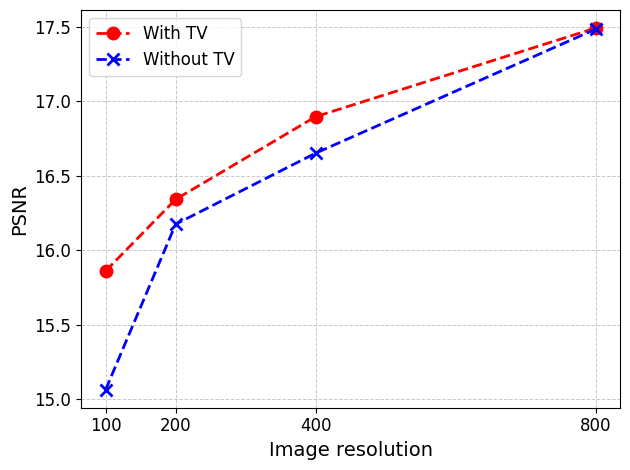

In [9]:
import matplotlib.pyplot as plt

# Data
x = [100, 200, 400, 800]
with_tv = [15.860168581008912, 16.341468858718873, 16.896988439559937, 17.492469291687012]  # test views with TV
without_tv = [15.062906188964844, 16.174531316757204, 16.65194808483124, 17.484801592826845]  # test views without TV

# Create the plot
plt.plot(x, with_tv, 'r--o', label="With TV", markersize=8, linewidth=2, markerfacecolor='r', markeredgewidth=2)
plt.plot(x, without_tv, 'b--x', label="Without TV", markersize=8, linewidth=2, markerfacecolor='b', markeredgewidth=2)

# Add labels and title
plt.xlabel('Image resolution', fontsize=14)
plt.ylabel('PSNR', fontsize=14)
# plt.title('Comparison of PSNR: With TV vs Without TV', fontsize=14)

# Customize ticks for x-axis
plt.xticks([100, 200, 400, 800], fontsize=12)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Increase font size for the y-axis ticks
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # To ensure labels don't get cut off
plt.savefig("/home/wl757/multiplexed-pixels/tv_comparision.pdf", format='pdf',bbox_inches='tight')
plt.show()


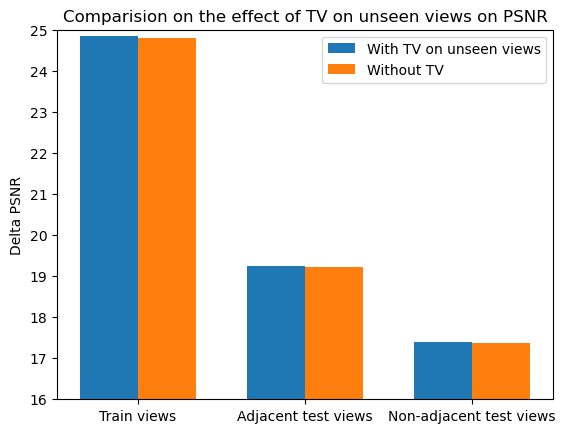

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
# [ITER 2000] Evaluating test: L1 0.0537646139661471 PSNR 19.251134554545082
# [ITER 2000] Evaluating non adj test: L1 0.07040316605767638 PSNR 17.39773836332498
# [ITER 2000] Evaluating train: L1 0.020770446863025427 PSNR 24.85298180580139

# #no tv
# [ITER 2000] Evaluating test: L1 0.0539125216503938 PSNR 19.225636800130207
# [ITER 2000] Evaluating non adj test: L1 0.07068846962347473 PSNR 17.378923303073215
# [ITER 2000] Evaluating train: L1 0.02094674517866224 PSNR 24.808830618858337
groups = ['Train views', 'Adjacent test views', "Non-adjacent test views"]
# Example data
category_1 = [24.85298180580139, 19.251134554545082,17.39773836332498]  # Data for category 1
category_2 = [24.808830618858337, 19.225636800130207, 17.378923303073215]  # Data for category 2

delta_psnr = [x-y for x,y in zip(category_1,category_2)]
# Set the positions for the bars
x = np.arange(len(groups))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
# ax.bar(x, delta_psnr)
# ax.set_ylim([16, 25])
# Create grouped bar charts
bars1 = ax.bar(x - width/2, category_1, width, label='With TV on unseen views')
bars2 = ax.bar(x + width/2, category_2, width, label='Without TV')

# Labeling the axes and the title
# ax.set_xlabel('Groups')
ax.set_ylabel('Delta PSNR')
ax.set_title('Comparision on the effect of TV on unseen views on PSNR')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()
ax.set_ylim([16, 25])

# Show the plot
plt.show()



In [ ]:
# tv vs no tv
#tv rendered images test views
# tv_images_dir = '/home/vitran/gs7/output2/lego_gen12_800_dls14/test/ours_2500/renders/'
# tv_images_dir = '/home/vitran/gs7/output2/lego_dls14_notv/test/ours_2500/renders/'

import json

def parse (path):
    def parse_json(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        ssim_values = data.get("ours_2500", {}).get("SSIM", {})
        psnr_values = data.get("ours_2500", {}).get("PSNR", {})
        
        parsed_data = {}
        for image_name in ssim_values.keys():
            parsed_data[image_name]={
                "image": image_name,
                "SSIM": ssim_values.get(image_name, None),
                "PSNR": psnr_values.get(image_name, None)
            }
        
        return parsed_data

    file_path = f'{path}/per_view.json'  # Update with your actual file path
    results = parse_json(file_path)

    # for entry in results:
    #     print(f"Image: {entry['image']}, SSIM: {entry['SSIM']:.4f}, PSNR: {entry['PSNR']:.2f}")
    return results
results = parse('/home/vitran/gs7/output2/lego_gen12_800_dls14')
results2 = parse('/home/vitran/gs7/output2/lego_dls14_notv')

In [ ]:
def get_adjacent_views(index, path):
    img90 = None
    # print("get adj from path", path)
    # with open('/home/vitran/plenoxels/blender_data/lego/transforms_train.json') as f:
    with open(f'{path}/transforms_train.json') as f:
    # with open('/home/vitran/plenoxels/blender_data/hotdog/transforms_train.json') as f:
        org_json = json.load(f)
        img90 = np.array(org_json['frames'][index[0]]['transform_matrix']).astype(float)
    allDiff = []
    # with open('/home/vitran/plenoxels/blender_data/lego/transforms_test.json') as f:
    with open(f'{path}/transforms_test.json') as f:
        org_json = json.load(f)
        for i,frames in enumerate(org_json['frames']):
            img = np.array(frames['transform_matrix']).astype(float)
            diff = np.mean(np.square(img90[:,-1]-img[:,-1]))
            allDiff.append([i, diff])
    allDiff.sort(key=lambda x:x[1])
    allDiff_index = [d[0] for d in allDiff]
    return allDiff_index
sorted_index = get_adjacent_views([59], '/home/vitran/plenoxels/blender_data/lego_gen12')
sorted_images = [f'{index:05}.png'  for index in sorted_index]


In [ ]:
sorted_psnr = []

for index in sorted_index:
    image_name = f'{index:05}.png' #00139.png
    sorted_psnr.append(results[image_name]['PSNR'])


In [ ]:
results2['00137.png']

{'image': '00137.png', 'SSIM': 0.5181353092193604, 'PSNR': 15.390034675598145}

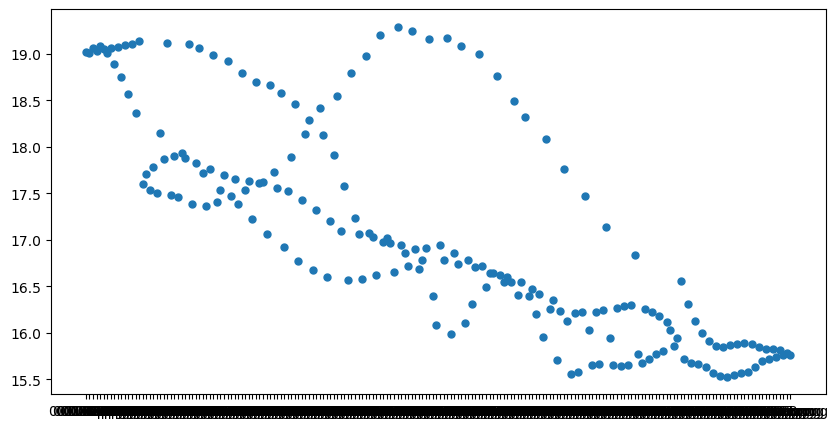

In [ ]:
sorted_data = sorted(list(results.items()), key=lambda x: float(x[1]["PSNR"]))  # Sort by PSNR
# print(list(results.items())[0][1]["PSNR"])
images = [item[1]['image'] for item in sorted_data]
psnr_values = [item[1]["PSNR"] for item in sorted_data]
psnr_values2 = [results2[image]["PSNR"] for image in images]
plt.figure(figsize=(10, 5))
# plt.plot(images, ssim_values, 'r--o', label="SSIM", markersize=5)  # Red dotted line with circles
plt.plot(sorted_images, sorted_psnr, 'o', label="PSNR", markersize=5)  # Blue dotted line with squares
# plt.plot(images, psnr_values, 'o', label="with TV", markersize=5)  # Blue dotted line with squares
# plt.plot(images, psnr_values2, 'x', label="no TV", markersize=5)  # Blue dotted line with squares


## One view graph

- [ ] chair
- [ ] hotdog
- [ ] ship
- [ ] mic
- [ ] lego
- [ ] ficus
- [ ] drums
- [ ] materials


In [1]:
blender_sets = ['chair', "mic","ship", "ficus", "materials", "drums", "hotdog","lego_gen12"] # "lego_gen12"
metrics = {}
def get_psnr_2500():
    for blen in blender_sets:
        metrics[blen] = {}
        for r in [800,400,200,100]:
            metrics[blen][r] = {}
            for d in [10,12,14,16,18,20,22,24]:
                metrics[blen][r][d] = {}
                path = f"/home/vitran/gs7/output2/{blen}_{r}_dls{d}_tv/output.txt"
                if d>=20:
                    path = f"/home/vitran/gs7/output2/{blen}_{r}_dls{d}_tv/output.txt"
                try:
                    with open(path, 'r') as f1:
                        for line in f1:
                            if line.startswith('[ITER 2500]'):
                                line = line.strip()
                                psnr = float(line.split(" ")[-1])
                                line = line.split("Evaluating")[1]
                                n_type = line.strip()
                                n_type = n_type.split(":")[0] 
                                if n_type=='train':
                                    metrics[blen][r][d]['train'] = psnr
                                elif n_type=='test':
                                    metrics[blen][r][d]['test'] = psnr 
                                elif n_type=='non adj test':
                                    metrics[blen][r][d]['non_adj_test'] = psnr    
                except FileNotFoundError:
                    print(path)
                    print('not found')   
    return metrics

metrics = get_psnr_2500()

1 800 10 train 26.646051988005638
1 800 10 test 21.894504706064858
1 800 10 non_adj_test 17.17912190079689
2 800 10 non_adj_test 17.17912190079689
1 800 12 train 26.328283965587616
1 800 12 test 21.588534792264305
1 800 12 non_adj_test 16.60008649587631
2 800 12 non_adj_test 16.60008649587631
1 800 14 train 26.80326257646084
1 800 14 test 21.624516884485878
1 800 14 non_adj_test 16.66093339085579
2 800 14 non_adj_test 16.66093339085579
1 800 16 train 28.069367095828056
1 800 16 test 22.002016047636666
1 800 16 non_adj_test 16.65448770225048
2 800 16 non_adj_test 16.65448770225048
1 800 18 train 27.358616590499878
1 800 18 test 21.515817026297253
1 800 18 non_adj_test 16.17281343102455
2 800 18 non_adj_test 16.17281343102455
1 800 20 train 29.383638620376587
1 800 20 test 22.058942635854084
1 800 20 non_adj_test 16.515519247055053
2 800 20 non_adj_test 16.515519247055053
1 800 22 train 26.418033495545387
1 800 22 test 21.01592938105265
1 800 22 non_adj_test 15.988480021357535
2 800 22 n

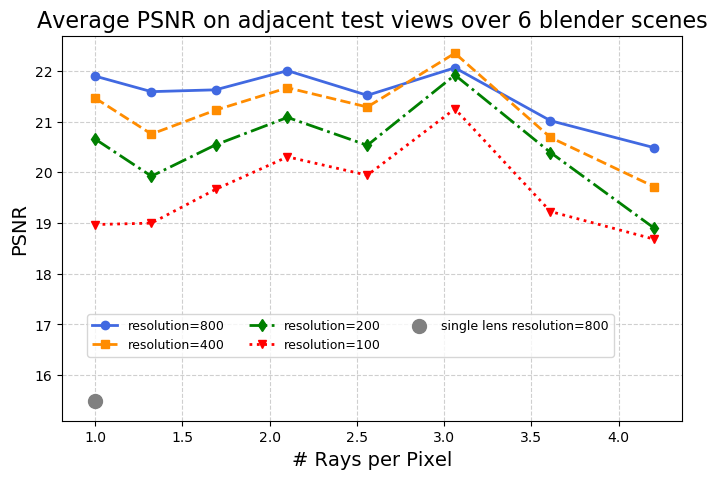

In [2]:
#average adj psnr 
acc_psnr = {}
for r in [800,400,200,100]:
    acc_psnr[r] = {}
    for d in [10,12,14,16,18,20,22,24]: 
        acc_psnr[r][d] = {'train':0.0, "test":0., "non_adj_test":0.}
        for t in ['train', 'test', 'non_adj_test']:
            for blen in blender_sets:
                acc_psnr[r][d][t] += metrics[blen][r][d][t]
            acc_psnr[r][d][t] = acc_psnr[r][d][t]/len(blender_sets)
            print('1', r,d,t, acc_psnr[r][d][t])
        print('2', r,d,t, acc_psnr[r][d][t])
    print('3', r,d,t, acc_psnr[r][d][t])

import matplotlib.pyplot as plt

# X-axis values
x_values = x = [1.,1.3225,1.69,2.1025, 2.56,3.062,3.61,4.2025]
# x_values = x = [1.,1.3225,1.69,2.1025, 2.56]
dls = [10, 12, 14, 16, 18,20,22,24]  # # Rays per Pixel

# Extract Y values from acc_psnr dictionary
psnr_800 = [acc_psnr[800][d]['test'] for d in dls]
psnr_400 = [acc_psnr[400][d]['test'] for d in dls]
psnr_200 = [acc_psnr[200][d]['test'] for d in dls]
psnr_100 = [acc_psnr[100][d]['test'] for d in dls]

# Create the plot
plt.figure(figsize=(8, 5))  # Set figure size

# Plot each line with different styles and labels
plt.plot(x_values, psnr_800, 'o-', color='royalblue', markersize=6, linewidth=2, label="resolution=800")
plt.plot(x_values, psnr_400, 's--', color='darkorange', markersize=6, linewidth=2, label="resolution=400")
plt.plot(x_values, psnr_200, 'd-.', color='green', markersize=6, linewidth=2, label="resolution=200")
plt.plot(x_values, psnr_100, 'v:', color='red', markersize=6, linewidth=2, label="resolution=100")
# plt.plot(x_values, [15.5 for x in psnr_100 ], '--',  color='black', markersize=6, linewidth=2, label="single_lens_resolution=800")
# Labels and Title
plt.xlabel("# Rays per Pixel", fontsize=14)
plt.ylabel("PSNR", fontsize=14)
plt.title("Average PSNR on adjacent test views over 6 blender scenes", fontsize=16)

# Formatting
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)  # Light grid
plt.scatter(1, 15.5, color='gray', s=100, label='single lens resolution=800', zorder=5)  # s=500 makes the dot big
plt.legend(fontsize=9, ncol=3, loc='lower right',bbox_to_anchor=(0.9, .15) )  # Add legend

# plt.tight_lay
plt.savefig('/home/vitran/average_psnr_v3.pdf', format='pdf', bbox_inches='tight')
plt.show()



In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

In [6]:
species

['chair', 'mic', 'ship', 'ficus', 'materials', 'drums', 'hotdog', 'lego_gen12']

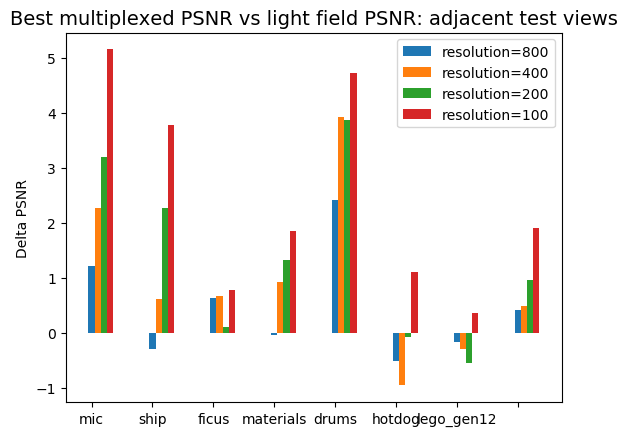

In [10]:
s = 'chair'
r = 400
res_values = [800,400,200,100]
best_value = {s: {r: {'adj_test': 0., 'non_adj_test':0.} for r in res_values} for s in blender_sets}
dls_values = dls
for s in blender_sets:
    for r in res_values:
        best_value[s][r]['adj_test'] = max([metrics[s][r][d]['test'] - metrics[s][r][10]['test'] for d in dls_values[1:]]) 
        best_value[s][r]['non_adj_test'] = max([metrics[s][r][d]['non_adj_test'] - metrics[s][r][10]['non_adj_test'] for d in dls_values[1:]]) 
        adj_psnrs = [metrics[s][r][d]['test'] for d in dls_values]
        non_adj_psnrs = [metrics[s][r][d]['non_adj_test'] for d in dls_values]

species = blender_sets
penguin_means = {
    r: [best_value[s][r]['adj_test'] for s in blender_sets] for r in res_values
}

x = np.arange(len(species))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for r, measurement in penguin_means.items():
    offset = width * multiplier
    label = f"resolution={r}"  # Label with resolution prefix
    rects = ax.bar(x + offset, measurement, width, label=label)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Delta PSNR')
plt.title("Best multiplexed PSNR vs light field PSNR: adjacent test views", fontsize=14)

# ax.set_xticks(x + width, species)
ax.set_xticklabels(species)  # label them as A, B, C...

# ax.legend(loc='upper right', ncols=4)
ax.legend()
# ax.set_ylim(0,  250)
plt.savefig('/home/vitran/best_psnr_v3.pdf', format='pdf', bbox_inches='tight')

plt.show()

chair = chair
mic = mic
ship = ship
ficus = ficus
materials = materials
drums = drums
hotdog = hotdog
lego = lego


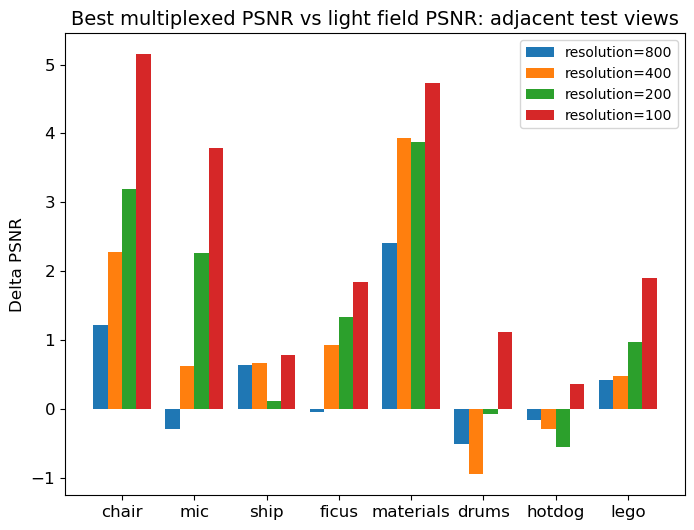

In [24]:
import string
fig, ax = plt.subplots(figsize=(8, 6))  # wider figure to fit spaced labels

species = ['chair', 'mic', 'ship', 'ficus', 'materials', 'drums', 'hotdog', 'lego_gen12']
labels = species #list(string.ascii_uppercase[:len(species)])  # ['A', 'B', 'C', ...]
labels[-1] = "lego"
group_spacing = 1  # Increase this for more spacing
x = np.arange(len(species)) * group_spacing
# x = np.arange(len(species))  # x = [0, 1, 2, ..., len(species)-1]

# plotting bars as usual
# fig, ax = plt.subplots()
multiplier = 0
width = 0.2

for r, measurement in penguin_means.items():
    offset = width * multiplier
    label = f"resolution={r}"
    ax.bar(x + offset, measurement, width, label=label)
    multiplier += 1

# Set proper ticks and labels
ax.set_xticks(x + width * (multiplier - 1) / 2)  # centers the tick labels under the group
ax.set_xticklabels(labels,fontsize=12)
ax.set_ylabel('Delta PSNR', fontsize=12)  # or try 18, 20, etc.

# Optional: Print label mapping
for letter, name in zip(labels, species):
    print(f"{letter} = {name}")

# Remaining plot decorations
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel('Delta PSNR')
plt.title("Best multiplexed PSNR vs light field PSNR: adjacent test views", fontsize=14)
ax.legend()
plt.savefig('/home/vitran/best_psnr_v3.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [14]:
res_value_100 = 100
table_value = {s: {'multiplexing': 0., 'non_multiplexing':0.} for s in blender_sets}
for s in blender_sets:
    # for r in res_values:
    table_value[s]['non_multiplexing'] = metrics[s][100][10]['test']  
    table_value[s]['multiplexing'] = metrics[s][100][16]['test']
v1_list = []
v2_list = []
a1 = 0. 
a2 = 0.
for s in blender_sets:
    print(s)
    v1 = f"{table_value[s]['non_multiplexing']:.3f}"
    v2 = f"{table_value[s]['multiplexing']:.3f}" 
    v1_list.append(v1)
    v2_list.append(v2)
    a1+=table_value[s]['non_multiplexing']
    a2+=table_value[s]['multiplexing']
    
m1 = a1/len(v1_list)
m2 = a2/len(v2_list)
v1_list.append(f"{m1:3f}")
v2_list.append(f"{m2:3f}")
v1_string = " & ".join(v1_list)
v2_string = " & ".join(v2_list)
print(v1_string)
print(v2_string)
    

chair
mic
ship
ficus
materials
drums
lego_gen12
18.402 & 23.871 & 22.409 & 21.975 & 18.347 & 15.112 & 16.122 & 19.462554
21.255 & 25.481 & 23.186 & 22.893 & 20.909 & 15.700 & 17.353 & 20.968125


## 5-view graph

- [ ] chair
- [ ] hotdog
- [ ] ship
- [ ] mic
- [ ] lego
- [ ] ficus
- [ ] drums
- [ ] materials

## Cube vs Sphere init